In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import networkx as nx
import sys
import random
sys.path.append('../src/')
from random_graph import RandGraph
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from random import choice
import json

In [55]:
def sequences_saturation(nb_points):
    rand_sets= {}
    steps = 500
    for i in range(nb_points):
        moving = choice(list(range(2,50,2)))
        n_entry_nodes = choice(list(range(2,10)))
        n_exit_nodes = choice(list(range(2,10)))
        n_core_nodes = choice(list(range(10,50,5)))
        n_paths = choice(list(range(5,50,5)))

        g = RandGraph(actors=10000, 
                          moving = moving, 
                          n_entry_nodes = n_entry_nodes,
                         n_exit_nodes = n_exit_nodes,
                         n_core_nodes = n_core_nodes,
                         n_paths = n_paths)
        data, nodes = g.step(n=steps)
        d = {}
        for x,node in enumerate(nodes):
            d[node] = data[:,x]
        rand_sets[i] = pd.DataFrame.from_dict(d)
        
        rand_sets[i]['moving'] = moving
        rand_sets[i]['n_entry_nodes'] = n_entry_nodes
        rand_sets[i]['n_exit_nodes'] = n_exit_nodes
        rand_sets[i]['n_core_nodes'] = n_core_nodes
        rand_sets[i]['n_paths'] = n_paths
        rand_sets[i]['congestion'] = rand_sets[i].iloc[:,:-6].mean(axis=1)
        rand_sets[i]['nb_saturated'] = (rand_sets[i].iloc[:,:-6] == 1.0).sum(axis=1)
        
    return rand_sets

In [63]:
data = sequences_saturation(10)

% 100 ||||||||||

In [64]:
data[0].head()

,9,10,11,12,13,14,15,16,17,18,...,21,22,23,moving,n_entry_nodes,n_exit_nodes,n_core_nodes,n_paths,congestion,nb_saturated
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,4,3,6,15,5,0.000000,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,4,3,6,15,5,0.011905,0
2,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,4,3,6,15,5,0.019048,0
3,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000000,0.0,...,0.1,0.0,0.0,4,3,6,15,5,0.024490,0
4,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000000,0.0,...,0.3,0.0,0.0,4,3,6,15,5,0.028571,0


In [65]:
for i,df in data.items():
    df.to_csv('../data/seq_%d.csv' % i)


In [101]:
df = data[4]

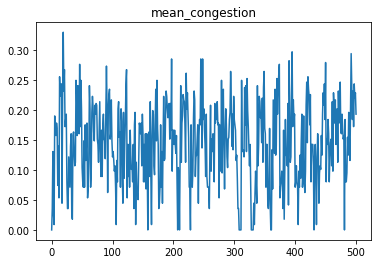

In [102]:
df.congestion.plot(kind='line', title='mean_congestion')
plt.show()

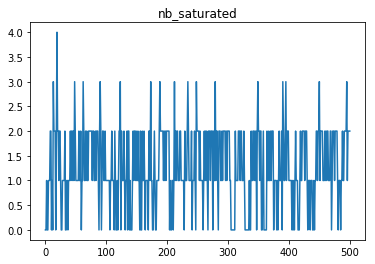

In [103]:
df.nb_saturated.plot(kind='line', title='nb_saturated')
plt.show()

In [104]:
df['sat_ratio'] = df.nb_saturated / df.n_core_nodes

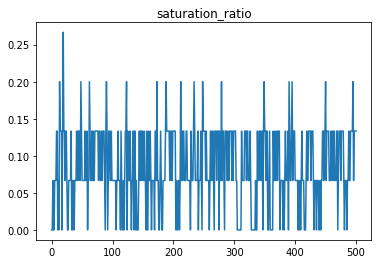

In [105]:
df.sat_ratio.plot(kind='line', title='saturation_ratio')
plt.show()